In [159]:
import numpy as np
import tensorflow as tf

with open("Part1_x_y_Values.txt") as f:
    data = [[float(i[0]), float(i[1])] for i in [i[1:-1].split(',') for i in f.read().split("\n")] if len(i) > 1]
    x = np.array([i[0] for i in data]).astype(np.float32)
    y = np.array([i[1] for i in data]).astype(np.float32)

# Three Features Model

In [160]:
a = tf.Variable(tf.random.normal([1], dtype=tf.float32))
b = tf.Variable(tf.random.normal([1], dtype=tf.float32))
c = tf.Variable(tf.random.normal([1], dtype=tf.float32))

In [161]:
def model(x):
    return a * x * x + b * x + c

In [162]:
def loss_fn(y, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y))

In [163]:
def stochastic_GD(x, y, lr = 0.01, epochs = 1000):
    loss_hist = []
    history = []
    idx = np.arange(0, len(x))
    np.random.shuffle(idx)
    for epoch in range(epochs):
        for i in range(len(x)):
            with tf.GradientTape() as tape:
                y_pred = model(x[idx[i]])
                loss = loss_fn(y[idx[i]], y_pred)
            gradients = tape.gradient(loss, [a, b, c])
            a.assign_sub(lr * gradients[0])
            b.assign_sub(lr * gradients[1])
            c.assign_sub(lr * gradients[2])
            loss_hist.append(loss_fn(y[idx[i]], model(x[idx[i]])))
            print("Epoch: %d, Loss: %.3f" % (epoch, loss_hist[-1]))
        history.append([a.numpy()[0], b.numpy()[0], c.numpy()[0]])
    return history, loss_hist

In [164]:
history, loss_hist = stochastic_GD(x, y, lr = 0.00001, epochs = 5)

Epoch: 0, Loss: 13.808
Epoch: 0, Loss: 509.466
Epoch: 0, Loss: 222.603
Epoch: 0, Loss: 1905.519
Epoch: 0, Loss: 129.094
Epoch: 0, Loss: 223.207
Epoch: 0, Loss: 100.458
Epoch: 0, Loss: 975.115
Epoch: 0, Loss: 47.788
Epoch: 0, Loss: 183.468
Epoch: 0, Loss: 2101.961
Epoch: 0, Loss: 1.121
Epoch: 0, Loss: 106.926
Epoch: 0, Loss: 2045.070
Epoch: 0, Loss: 622.644
Epoch: 0, Loss: 293.577
Epoch: 0, Loss: 96.867
Epoch: 0, Loss: 161.989
Epoch: 0, Loss: 170.634
Epoch: 0, Loss: 10.339
Epoch: 0, Loss: 7.210
Epoch: 0, Loss: 191.337


Epoch: 0, Loss: 146.017
Epoch: 0, Loss: 2.640
Epoch: 0, Loss: 271.009
Epoch: 0, Loss: 112.264
Epoch: 0, Loss: 10.761
Epoch: 0, Loss: 166.821
Epoch: 0, Loss: 975.174
Epoch: 0, Loss: 13.793
Epoch: 0, Loss: 11.162
Epoch: 0, Loss: 521.849
Epoch: 0, Loss: 4.068
Epoch: 0, Loss: 2.038
Epoch: 0, Loss: 0.452
Epoch: 0, Loss: 5.259
Epoch: 0, Loss: 34.530
Epoch: 0, Loss: 137.857
Epoch: 0, Loss: 396.223
Epoch: 0, Loss: 151.350
Epoch: 0, Loss: 65.142
Epoch: 0, Loss: 290.443
Epoch: 0, Loss: 62.881
Epoch: 0, Loss: 123.015
Epoch: 0, Loss: 266.066
Epoch: 0, Loss: 79.161
Epoch: 0, Loss: 69.359
Epoch: 0, Loss: 171.649
Epoch: 0, Loss: 85.359
Epoch: 0, Loss: 56.104
Epoch: 0, Loss: 151.276
Epoch: 0, Loss: 102.839
Epoch: 0, Loss: 4.709
Epoch: 0, Loss: 9.387
Epoch: 0, Loss: 53.254
Epoch: 0, Loss: 115.734
Epoch: 0, Loss: 28.826
Epoch: 0, Loss: 39.287
Epoch: 0, Loss: 126.440
Epoch: 0, Loss: 147.896
Epoch: 0, Loss: 4.911
Epoch: 0, Loss: 121.723
Epoch: 0, Loss: 226.772
Epoch: 0, Loss: 221.524
Epoch: 0, Loss: 321.4

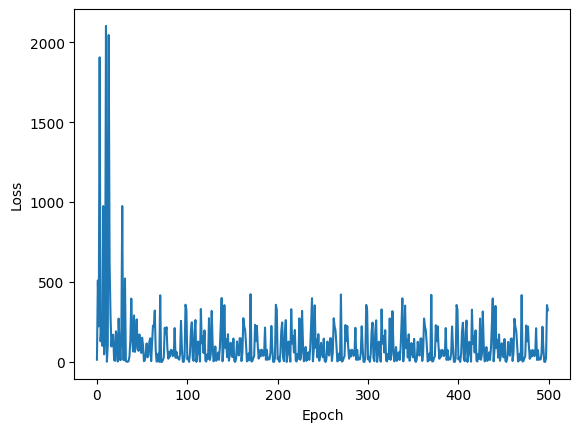

In [165]:
import matplotlib.pyplot as plt
plt.plot(loss_hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

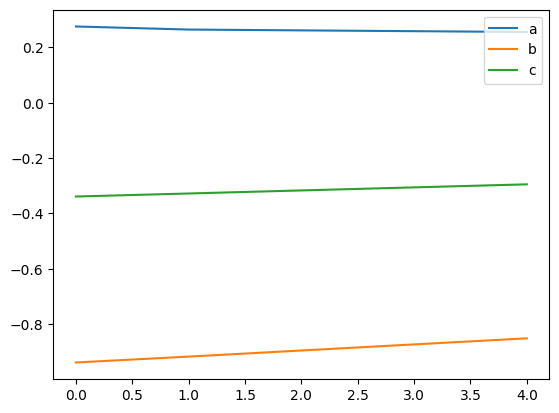

In [166]:
#plot the features over the epochs
plt.plot([i[0] for i in history], label='a')
plt.plot([i[1] for i in history], label='b')
plt.plot([i[2] for i in history], label='c')
plt.legend()

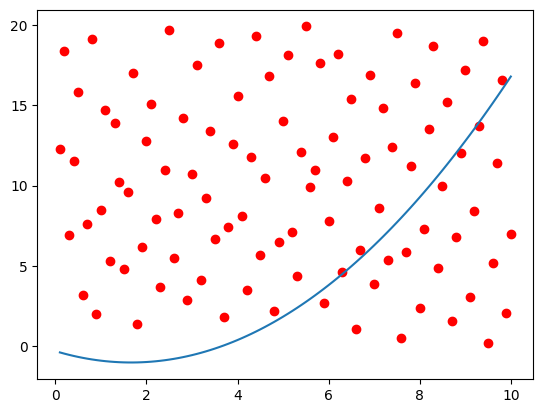

In [167]:
plt.plot(x, y, 'ro')
plt.plot(x, np.array(history[-1][0] * x * x + history[-1][1] * x + history[-1][2]))
plt.show()

# Four Feature Model

In [168]:
a = tf.Variable(tf.random.normal([1], dtype=tf.float32))
b = tf.Variable(tf.random.normal([1], dtype=tf.float32))
c = tf.Variable(tf.random.normal([1], dtype=tf.float32))
d = tf.Variable(tf.random.normal([1], dtype=tf.float32))

In [169]:
def cubic_model(x):
    return a * x * x * x + b * x * x + c * x + d


In [170]:
def stochastic_GD_four(x, y, lr = 0.01, epochs=1000):
    loss_hist = []
    history = []
    idx = np.arange(0, len(x))
    np.random.shuffle(idx)
    for epoch in range(epochs):
        for i in range(len(x)):
            with tf.GradientTape() as tape:
                y_pred = cubic_model(x[idx[i]])
                loss = loss_fn(y[idx[i]], y_pred)
            gradients = tape.gradient(loss, [a, b, c, d])
            a.assign_sub(lr * gradients[0])
            b.assign_sub(lr * gradients[1])
            c.assign_sub(lr * gradients[2])
            d.assign_sub(lr * gradients[3])
            loss_hist.append(loss_fn(y[idx[i]], cubic_model(x[idx[i]])))
            print("Epoch: %d, Loss: %.3f" % (epoch, loss_hist[-1]))
        history.append([a.numpy()[0], b.numpy()[0], c.numpy()[0], d.numpy()[0]])
    return history, loss_hist

In [171]:
history, loss_hist = stochastic_GD_four(x, y, lr=0.000001, epochs=3)

Epoch: 0, Loss: 49.433
Epoch: 0, Loss: 11.661
Epoch: 0, Loss: 3898.216
Epoch: 0, Loss: 7.163
Epoch: 0, Loss: 69.152
Epoch: 0, Loss: 410.151
Epoch: 0, Loss: 1.083
Epoch: 0, Loss: 149.924
Epoch: 0, Loss: 358.046
Epoch: 0, Loss: 45.678
Epoch: 0, Loss: 0.726
Epoch: 0, Loss: 169.038
Epoch: 0, Loss: 13.762
Epoch: 0, Loss: 10.987
Epoch: 0, Loss: 497.823
Epoch: 0, Loss: 115.681
Epoch: 0, Loss: 58.919
Epoch: 0, Loss: 147.939
Epoch: 0, Loss: 36.546
Epoch: 0, Loss: 99.028
Epoch: 0, Loss: 40.518
Epoch: 0, Loss: 1.382
Epoch: 0, Loss: 235.537
Epoch: 0, Loss: 0.435
Epoch: 0, Loss: 218.831
Epoch: 0, Loss: 84.390
Epoch: 0, Loss: 46.922
Epoch: 0, Loss: 1.583
Epoch: 0, Loss: 135.359
Epoch: 0, Loss: 88.798
Epoch: 0, Loss: 255.747
Epoch: 0, Loss: 328.871
Epoch: 0, Loss: 2.559
Epoch: 0, Loss: 1374.659
Epoch: 0, Loss: 528.762
Epoch: 0, Loss: 57.130
Epoch: 0, Loss: 339.923
Epoch: 0, Loss: 4.305
Epoch: 0, Loss: 183.939
Epoch: 0, Loss: 7.422
Epoch: 0, Loss: 46.597
Epoch: 0, Loss: 25.920
Epoch: 0, Loss: 31.165
E

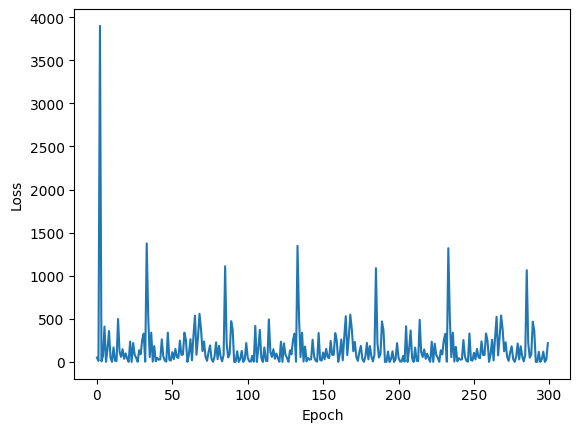

In [172]:
plt.plot(loss_hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

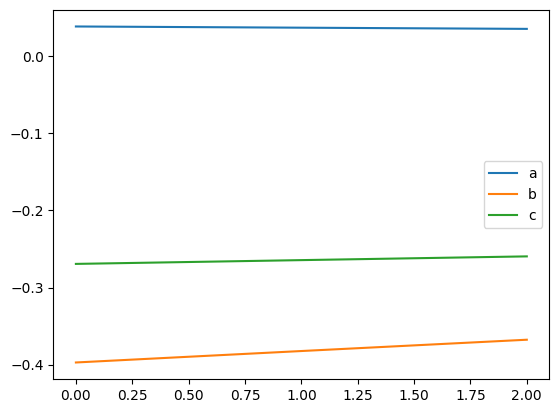

In [173]:
#plot the features over the epochs
plt.plot([i[0] for i in history], label='a')
plt.plot([i[1] for i in history], label='b')
plt.plot([i[2] for i in history], label='c')
plt.legend()

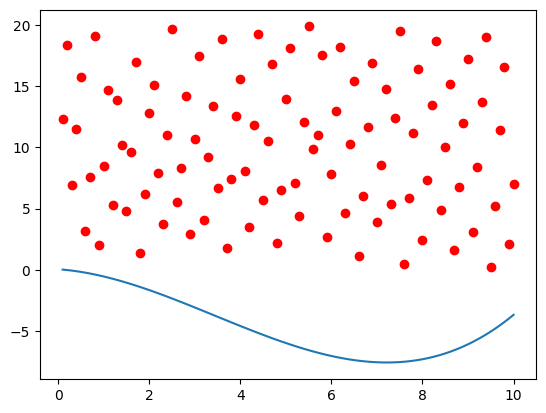

In [174]:
plt.plot(x, y, 'ro')
plt.plot(x, np.array(history[-1][0] * x * x * x + history[-1][1] * x * x + history[-1][2] * x + history[-1][3]))
plt.show()

# Five Feature Model

In [175]:
a = tf.Variable(tf.random.normal([1], dtype=tf.float32))
b = tf.Variable(tf.random.normal([1], dtype=tf.float32))
c = tf.Variable(tf.random.normal([1], dtype=tf.float32))
d = tf.Variable(tf.random.normal([1], dtype=tf.float32))
e = tf.Variable(tf.random.normal([1], dtype=tf.float32))

In [176]:
def quintic_model(x):
    return a * tf.pow(x, 4) + b * tf.pow(x, 3) + c * tf.pow(x, 2) + d * x + e

In [177]:
def stochastic_GD_five(x, y, lr = 0.01, epochs=1000):
    loss_hist = []
    history = []
    idx = np.arange(0, len(x))
    np.random.shuffle(idx)
    for epoch in range(epochs):
        for i in range(len(x)):
            with tf.GradientTape() as tape:
                y_pred = quintic_model(x[idx[i]])
                loss = loss_fn(y[idx[i]], y_pred)
            gradients = tape.gradient(loss, [a, b, c, d, e])
            a.assign_sub(lr * gradients[0])
            b.assign_sub(lr * gradients[1])
            c.assign_sub(lr * gradients[2])
            d.assign_sub(lr * gradients[3])
            e.assign_sub(lr * gradients[4])
            loss_hist.append(loss_fn(y[idx[i]], quintic_model(x[idx[i]])))
            print("Epoch: %d, Loss: %.3f" % (epoch, loss_hist[-1]))
        history.append([a.numpy()[0], b.numpy()[0], c.numpy()[0], d.numpy()[0], e.numpy()[0]])
    return history, loss_hist

In [178]:
history, loss_hist = stochastic_GD_five(x, y, lr = 0.00000001, epochs = 3)

Epoch: 0, Loss: 18.728
Epoch: 0, Loss: 6811491.000
Epoch: 0, Loss: 11758.225
Epoch: 0, Loss: 57204.309
Epoch: 0, Loss: 39.981
Epoch: 0, Loss: 213.713
Epoch: 0, Loss: 40.996
Epoch: 0, Loss: 1009576.062
Epoch: 0, Loss: 142.407
Epoch: 0, Loss: 2070203.500
Epoch: 0, Loss: 280264.062
Epoch: 0, Loss: 450604.094
Epoch: 0, Loss: 203.456
Epoch: 0, Loss: 70.106
Epoch: 0, Loss: 257.286
Epoch: 0, Loss: 5127.484
Epoch: 0, Loss: 3855.423
Epoch: 0, Loss: 3.446
Epoch: 0, Loss: 8732.651
Epoch: 0, Loss: 1295.428
Epoch: 0, Loss: 5074.050
Epoch: 0, Loss: 1224.803
Epoch: 0, Loss: 8319.087
Epoch: 0, Loss: 6155.777
Epoch: 0, Loss: 291.556
Epoch: 0, Loss: 5.034
Epoch: 0, Loss: 4970.171
Epoch: 0, Loss: 1.185
Epoch: 0, Loss: 294.856
Epoch: 0, Loss: 109.645
Epoch: 0, Loss: 4245.869
Epoch: 0, Loss: 393.677
Epoch: 0, Loss: 1545.375
Epoch: 0, Loss: 1881.812
Epoch: 0, Loss: 118.252
Epoch: 0, Loss: 358.363
Epoch: 0, Loss: 975.806
Epoch: 0, Loss: 12.443
Epoch: 0, Loss: 7421.159
Epoch: 0, Loss: 2013.979
Epoch: 0, Loss:

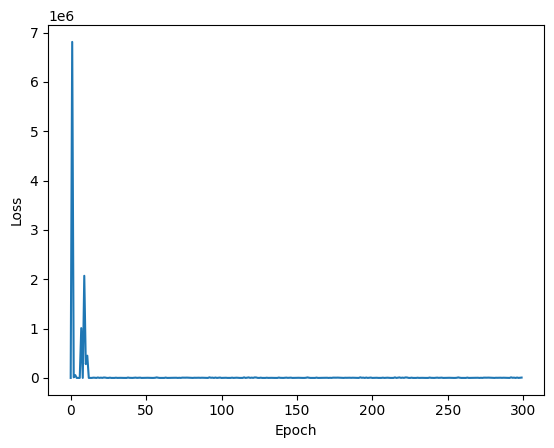

In [179]:
plt.plot(loss_hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

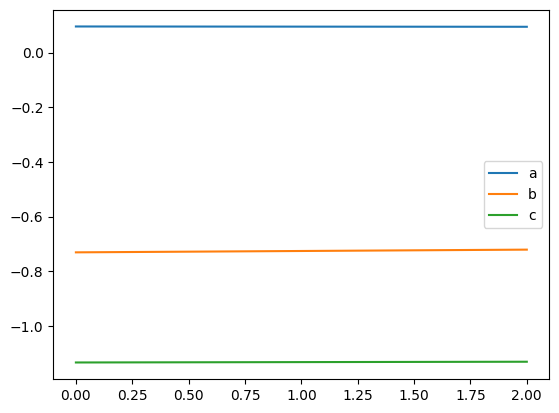

In [180]:
#plot the features over the epochs
plt.plot([i[0] for i in history], label='a')
plt.plot([i[1] for i in history], label='b')
plt.plot([i[2] for i in history], label='c')
plt.legend()

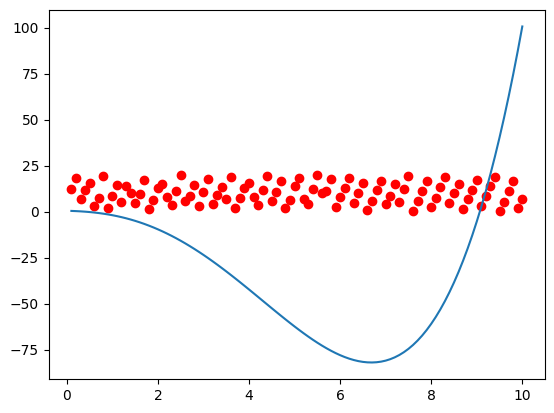

In [181]:
plt.plot(x, y, 'ro')
plt.plot(x, np.array(history[-1][0] * tf.pow(x, 4) + history[-1][1] * tf.pow(x, 3) + history[-1][2] * tf.pow(x, 2) + history[-1][3] * x + history[-1][4]))
plt.show()